In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/darshML/ML-Projects/main/Datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [6]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [7]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [8]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [10]:
df['total score'] = df['math score'] + df['writing score'] + df['reading score']

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [11]:
#Average Scores
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))
print("Average total score is   : {}".format(np.mean(df['total score'])))


Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 203.312


In [12]:
(40/100) * max(df['total score']) 

120.0

Defining Custom feature Pass/Fail. We are assuming that the passing criterion if a student has a Total Score of 100 (i.e 40% of total score) or above & above the 40% of the marks in each of writing , reading, maths- then they have Passed, otherwise, they Failed.

In [13]:
def result(TS,MS,WS,RS ):
    if(TS>120 and MS>40 and WS>40 and RS>40):
        return 'P'
    else:
        return 'F'

In [14]:
df['Pass/Fail']=df.apply(lambda x: result(x['total score'],x['math score'],x['writing score'],x['reading score']),axis = 1 )


In [15]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Pass/Fail
910,male,group D,bachelor's degree,free/reduced,none,50,42,48,140,P


In [16]:
df['Pass/Fail'].value_counts()

P    939
F     61
Name: Pass/Fail, dtype: int64

## Visualization:

#### Impact of Gender in Performance of students

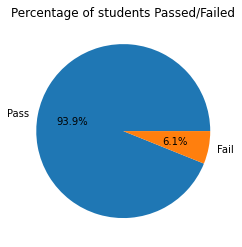

In [17]:
plt.pie(df['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of students Passed/Failed');

In [18]:
# % of female students passed
print("female pass % = ", df[(df['gender']=='female') & (df['Pass/Fail']=='P')].shape[0]/df[df['gender']=='female'].shape[0]*100)

# % of male students passed
print("male pass % = ", df[(df['gender']=='male') & (df['Pass/Fail']=='P')].shape[0]/df[df['gender']=='male'].shape[0]*100)


female pass % =  92.85714285714286
male pass % =  95.0207468879668


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


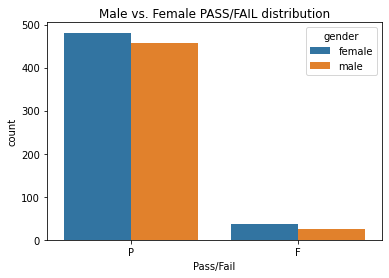

In [19]:
sns.countplot(df['Pass/Fail'],hue=df['gender']);
plt.title('Male vs. Female PASS/FAIL distribution');

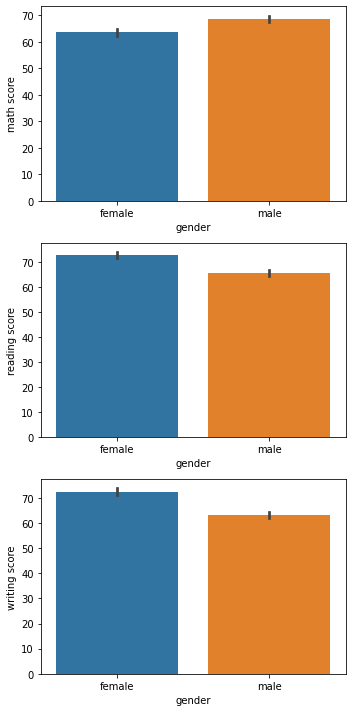

In [20]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=df['gender'],y=df['math score'], ax=ax[0], linewidth=2.5)
sns.barplot(x=df['gender'],y=df['reading score'], ax=ax[1],linewidth=2.5)
sns.barplot(x=df['gender'],y=df['writing score'], ax=ax[2],linewidth=2.5)
plt.tight_layout()

#### Impact of Race/Ethnicity in Performance of students:

In [21]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

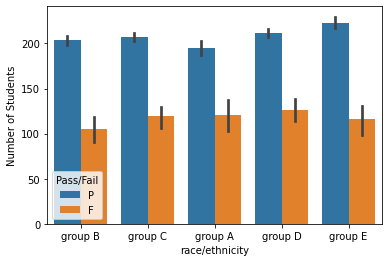

In [22]:
sns.barplot(x=df['race/ethnicity'],y=df['total score'],hue=df['Pass/Fail'])
plt.ylabel('Number of Students');

In [23]:
# % of students of group A who have passed
print('Percentage of students passed from GROUP A : ', df[(df['race/ethnicity']=='group A') & (df['Pass/Fail']=='P')].shape[0]/df[df['race/ethnicity']=='group A'].shape[0] *100 )

# % of students of group B who have passed
print('Percentage of students passed from GROUP B : ', df[(df['race/ethnicity']=='group B') & (df['Pass/Fail']=='P')].shape[0]/df[df['race/ethnicity']=='group B'].shape[0] *100 )

# % of students of group C who have passed
print('Percentage of students passed from GROUP C : ', df[(df['race/ethnicity']=='group C') & (df['Pass/Fail']=='P')].shape[0]/df[df['race/ethnicity']=='group C'].shape[0] *100 )

# % of students of group D who have passed
print('Percentage of students passed from GROUP D : ', df[(df['race/ethnicity']=='group D') & (df['Pass/Fail']=='P')].shape[0]/df[df['race/ethnicity']=='group D'].shape[0] *100 )

# % of students of group E who have passed
print('Percentage of students passed from GROUP E : ', df[(df['race/ethnicity']=='group E') & (df['Pass/Fail']=='P')].shape[0]/df[df['race/ethnicity']=='group E'].shape[0] *100 )


Percentage of students passed from GROUP A :  92.13483146067416
Percentage of students passed from GROUP B :  92.63157894736842
Percentage of students passed from GROUP C :  93.41692789968651
Percentage of students passed from GROUP D :  95.0381679389313
Percentage of students passed from GROUP E :  95.71428571428572


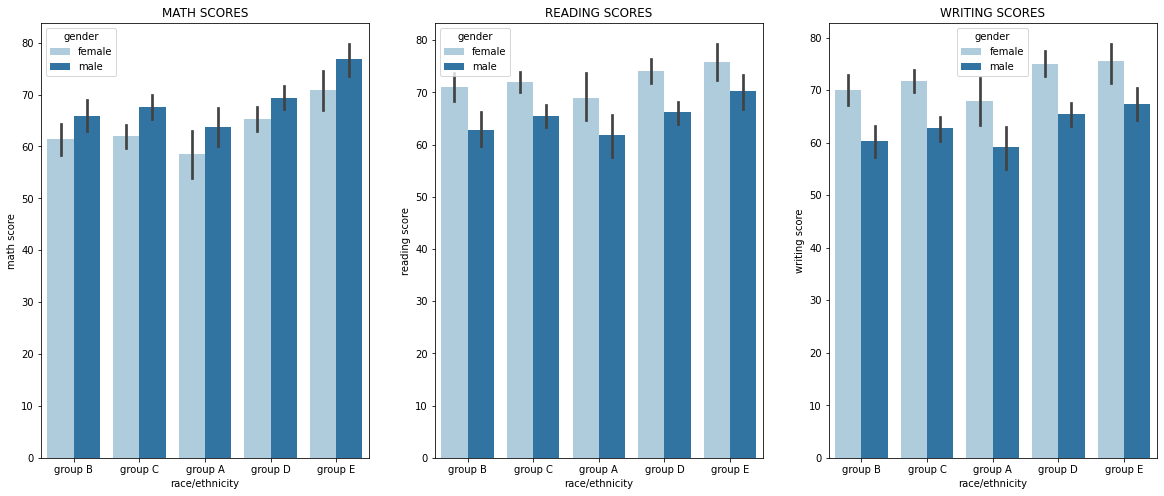

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')
plt.show()

<AxesSubplot:title={'center':'Total Score across race/ethnicity of students'}, xlabel='race/ethnicity', ylabel='total score'>

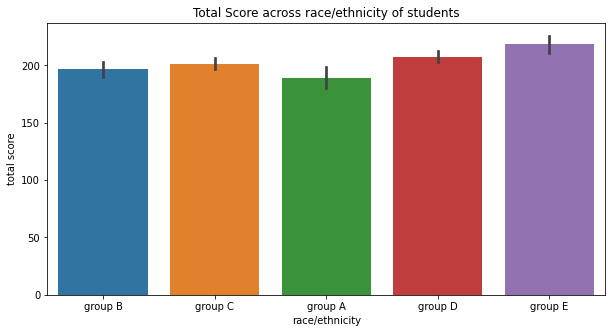

In [25]:
plt.figure(figsize=(10,5))
plt.title("Total Score across race/ethnicity of students")
sns.barplot(x=df['race/ethnicity'],y=df['total score'])

#### Impact Of Parents Educational Background on Performance of the students.

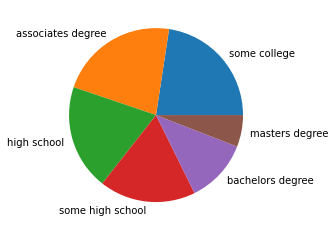

In [26]:
plt.pie(df['parental level of education'].value_counts(), labels=['some college','associates degree','high school','some high school','bachelors degree','masters degree']);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


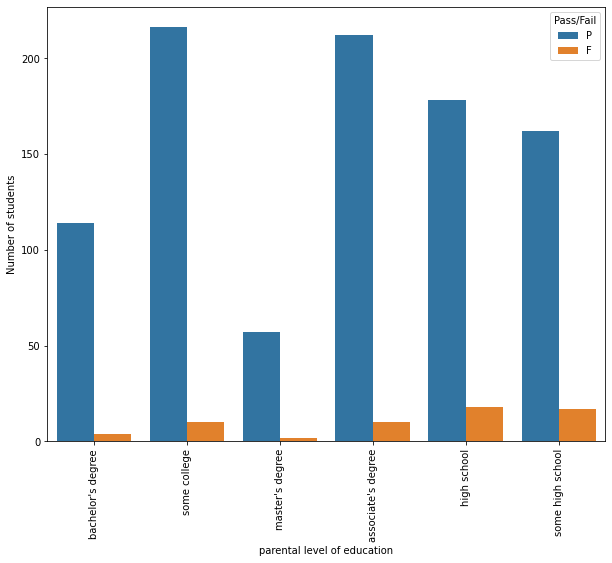

In [27]:
plt.figure(figsize= (10,8))
sns.countplot(df['parental level of education'],hue=df['Pass/Fail'])
plt.xticks(rotation=90)
plt.ylabel('Number of students');

<AxesSubplot:title={'center':'Total Score across parental level of education of students'}, xlabel='parental level of education', ylabel='total score'>

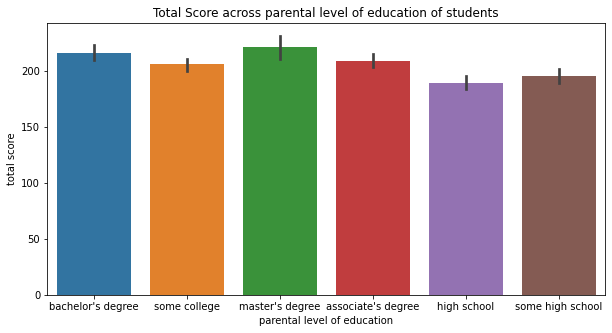

In [28]:
plt.figure(figsize=(10,5))
plt.title("Total Score across parental level of education of students")
sns.barplot(x=df['parental level of education'],y=df['total score'])


In [29]:
# % of students with parental level of education as some college who have passed
print('Percentage of students with parental level of education as some college : ', df[(df['parental level of education']=='some college') & (df['Pass/Fail']=='P')].shape[0]/df[df['parental level of education']=='some college'].shape[0] *100 )

# % of students with parental level of education as associate's degree who have passed
print('Percentage of students with parental level of education as associates degree : ', df[(df['parental level of education']=="associate's degree") & (df['Pass/Fail']=='P')].shape[0]/df[df['parental level of education']=="associate's degree"].shape[0] *100 )

# % of students with parental level of education as high school who have passed
print('Percentage of students with parental level of education as high school : ', df[(df['parental level of education']=='high school') & (df['Pass/Fail']=='P')].shape[0]/df[df['parental level of education']=='high school'].shape[0] *100 )

# % of students with parental level of education as some high school who have passed
print('Percentage of students with parental level of education as some high school : ', df[(df['parental level of education']=='some high school') & (df['Pass/Fail']=='P')].shape[0]/df[df['parental level of education']=='some high school'].shape[0] *100 )

# % of students with parental level of education as bachelor's degree who have passed
print('Percentage of students with parental level of education as bachelors degree : ', df[(df['parental level of education']=="bachelor's degree") & (df['Pass/Fail']=='P')].shape[0]/df[df['parental level of education']=="bachelor's degree"].shape[0] *100 )

# % of students with parental level of education as master's degree who have passed
print('Percentage of students with parental level of education as masters degree : ', df[(df['parental level of education']=="master's degree") & (df['Pass/Fail']=='P')].shape[0]/df[df['parental level of education']=="master's degree"].shape[0] *100 )


Percentage of students with parental level of education as some college :  95.57522123893806
Percentage of students with parental level of education as associates degree :  95.4954954954955
Percentage of students with parental level of education as high school :  90.81632653061224
Percentage of students with parental level of education as some high school :  90.5027932960894
Percentage of students with parental level of education as bachelors degree :  96.61016949152543
Percentage of students with parental level of education as masters degree :  96.61016949152543


#### Impact of Lunch Quality on Performance of sudents

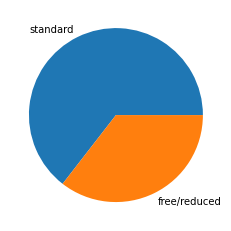

In [30]:
plt.pie(df['lunch'].value_counts(),labels=['standard','free/reduced']);

standard        629
free/reduced    310
Name: lunch, dtype: int64





/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


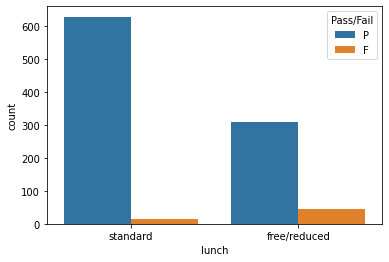

In [31]:
print(df['lunch'].loc[df['Pass/Fail']=='P'].value_counts())
print('\n\n')
sns.countplot(df['lunch'],hue=df['Pass/Fail']);


In [32]:
# Percentage of students passsed with standard quality of lunch
print('Percentage of students passed with standard lunch quality :', df[(df['lunch']=='standard') & (df['Pass/Fail']=='P')].shape[0]/df[df['lunch']=='standard'].shape[0]*100)

# Percentage of students passsed with free/reduced quality of lunch
print('Percentage of students passed with free/reduced lunch quality :', df[(df['lunch']=='free/reduced') & (df['Pass/Fail']=='P')].shape[0]/df[df['lunch']=='free/reduced'].shape[0]*100)

Percentage of students passed with standard lunch quality : 97.51937984496124
Percentage of students passed with free/reduced lunch quality : 87.32394366197182


<AxesSubplot:title={'center':'Total Score across the type of lunch of the students'}, xlabel='lunch', ylabel='total score'>

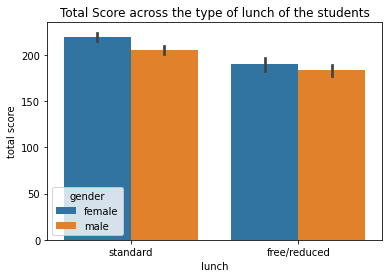

In [33]:
plt.title("Total Score across the type of lunch of the students")
sns.barplot(x=df['lunch'],y=df['total score'],hue=df['gender'])


#### Impact of completing the 'Test Preparation Course' on Scores

In [34]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Thus out of the 1000 students, 642 students didn't complete the 'Test preparation course' and 358 students completed it.

In [35]:
print("The number of students passed across the status of completion of the test preparation course:")
print(df['test preparation course'].loc[df['Pass/Fail']=='P'].value_counts())

The number of students passed across the status of completion of the test preparation course:
none         591
completed    348
Name: test preparation course, dtype: int64


In [36]:
#to find out the percentage of students passed with the test preparation course status as 'none'
print("Percentage of students passed with the test preparation course status as 'none': {0:.2f}%"
    .format((df[(df['test preparation course']=='none') & (df['Pass/Fail']=='P')].shape[0]/df[df['test preparation course']=='none'].shape[0])*100))

#to find out the percentage of students passed with the test preparation course status as 'completed'
print("Percentage of students passed with the test preparation course status as 'completed': {0:.2f}%"
    .format((df[(df['test preparation course']=="completed") & (df['Pass/Fail']=='P')].shape[0]/df[df['test preparation course']=="completed"].shape[0])*100))


Percentage of students passed with the test preparation course status as 'none': 92.06%
Percentage of students passed with the test preparation course status as 'completed': 97.21%


Text(0.5, 0, 'Status of Test Prep Course')

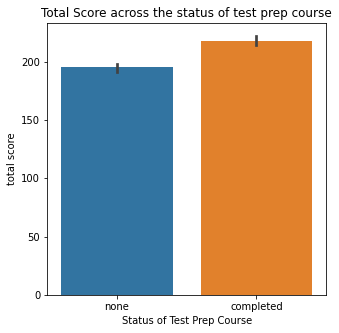

In [37]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['test preparation course'],y=df['total score'])
plt.title("Total Score across the status of test prep course")
plt.xlabel('Status of Test Prep Course')

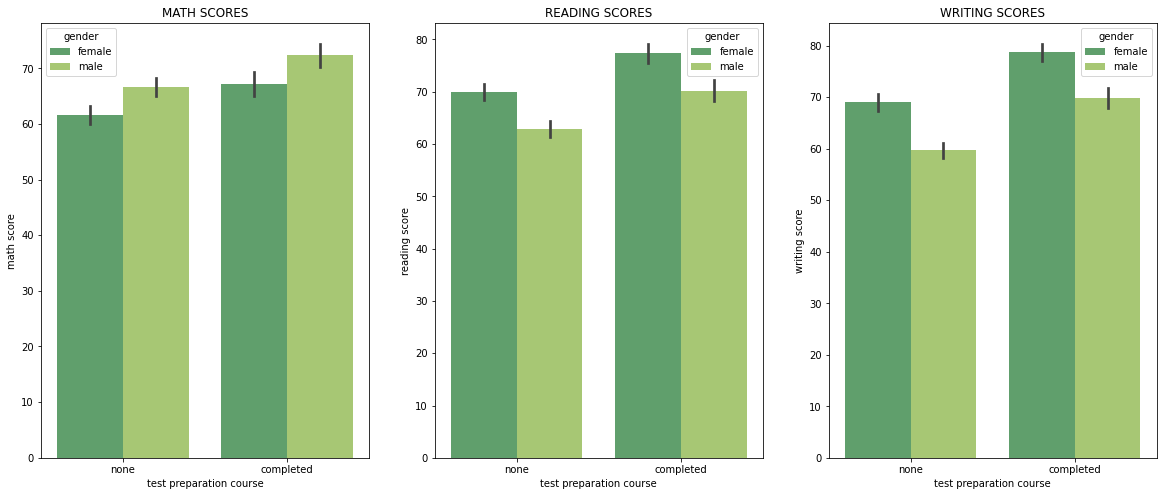

In [38]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='summer')
plt.title('WRITING SCORES')
plt.show()

From the first plot we can see the math scores of boys are better irrespective of wether they completed the course or no.

From the next two plots we can see that girls perform more better in reading and writing.

From all three graphs its clear that if the course is completed we can achieve higher scores

### Distribution of Scores

MAth Score:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


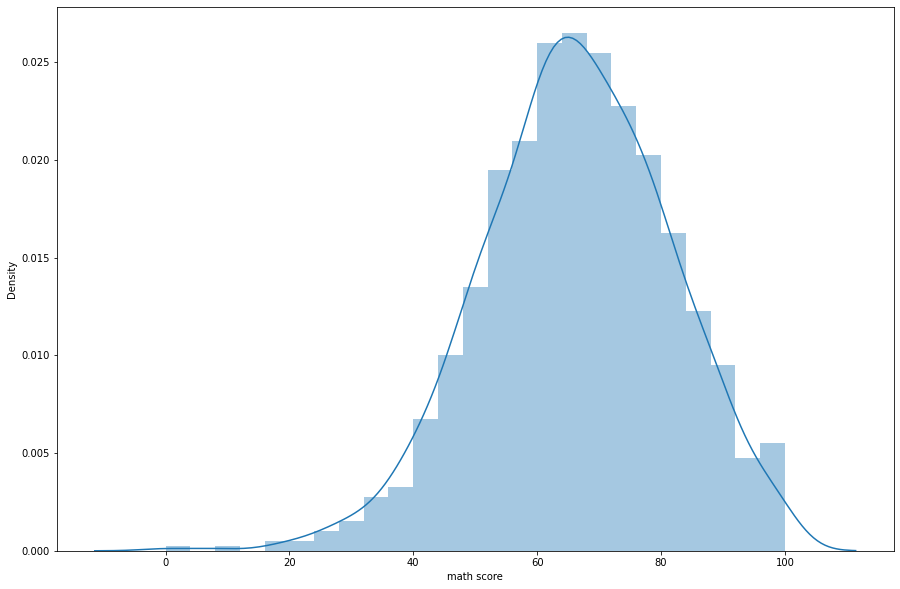

In [39]:
plt.figure(figsize=(15,10))
sns.distplot(df['math score']);

no skewnesss in this target column : math score

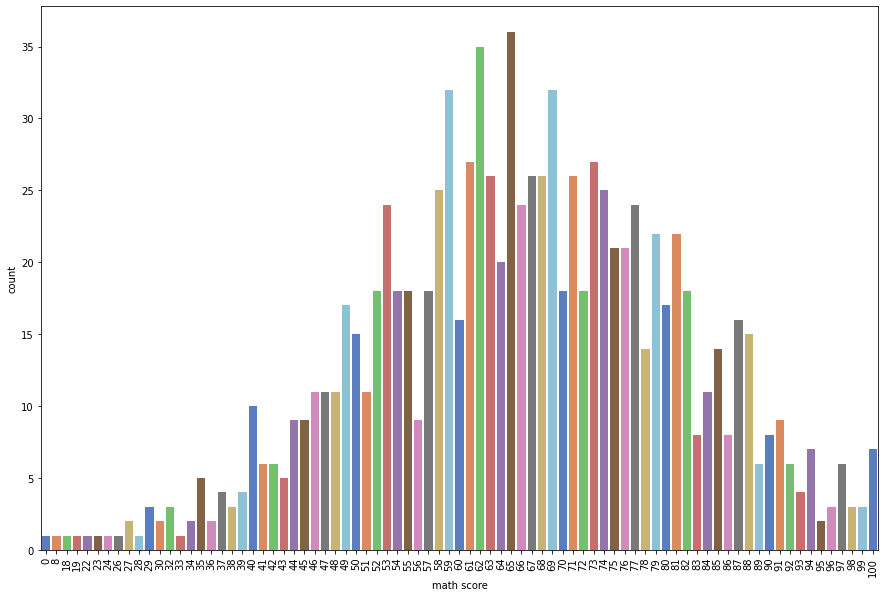

In [40]:
plt.figure(figsize=(15,10))
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

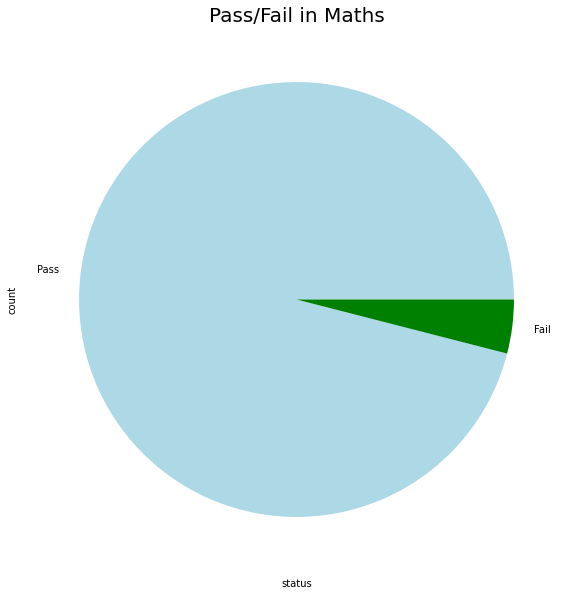

In [41]:

plt.figure(figsize=(15,10))
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'green'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

Reading Score:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


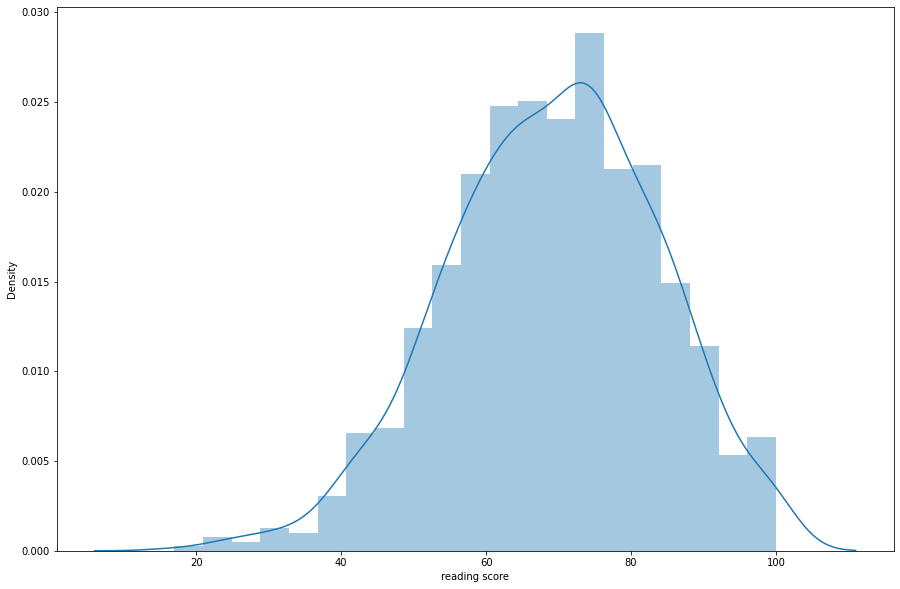

In [42]:
plt.figure(figsize=(15,10))
sns.distplot(df['reading score']);

No skewness on this target column : reading score

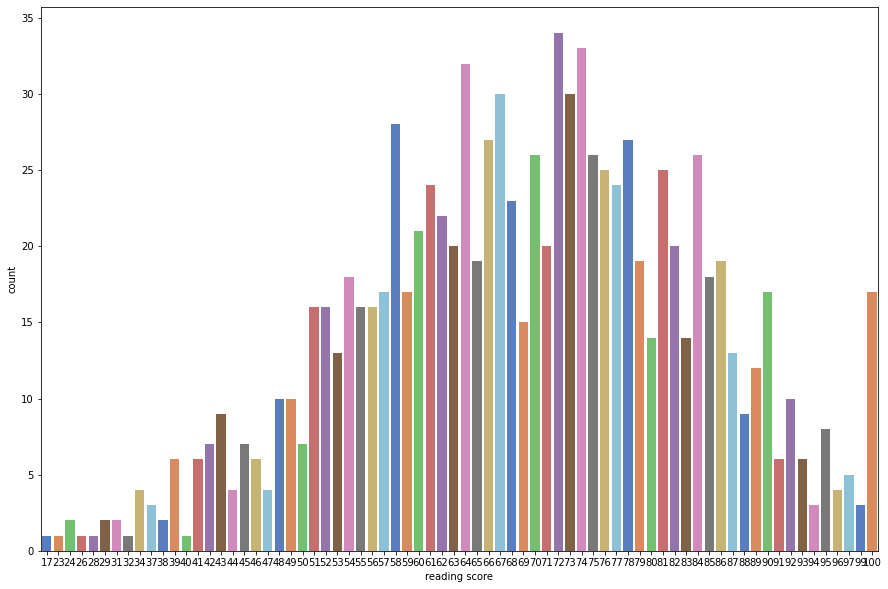

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

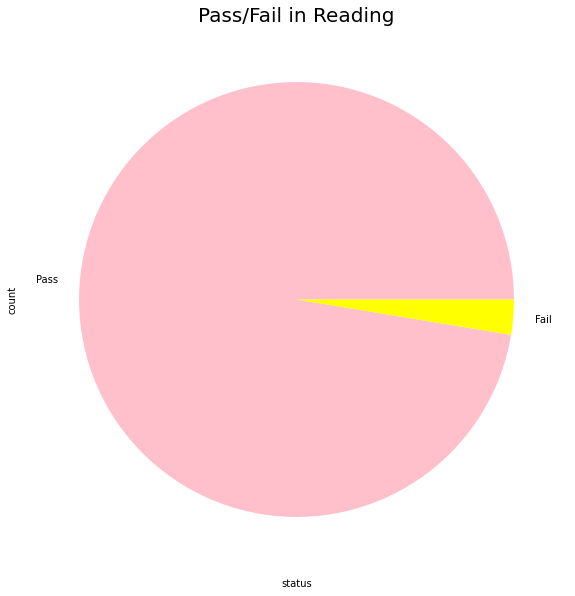

In [44]:
plt.figure(figsize=(15,10))

# creating a new column pass_reading, this column will tell us whether the students are pass or fail

df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

Writing Score:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


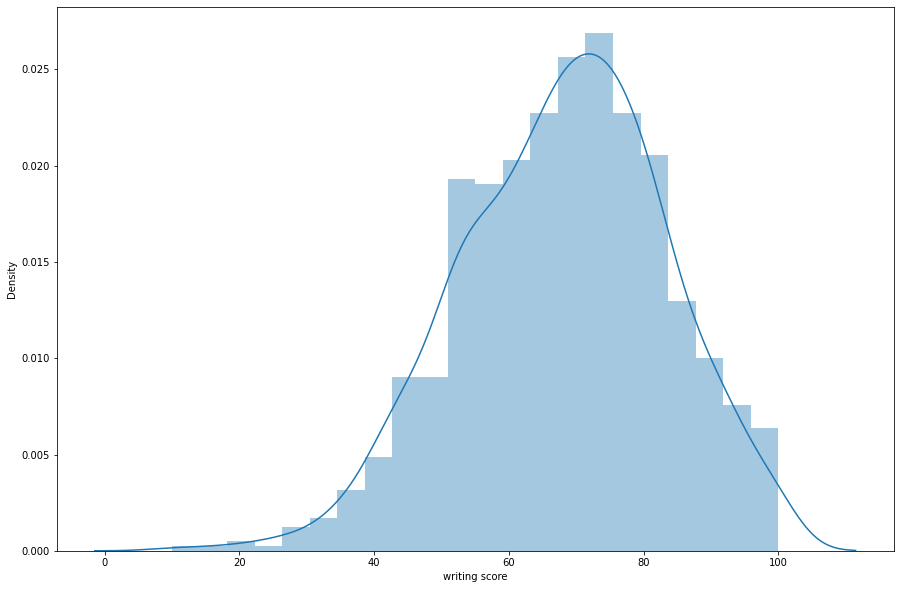

In [45]:
plt.figure(figsize=(15,10))
sns.distplot(df['writing score']);

No skewness in this target column : writing score

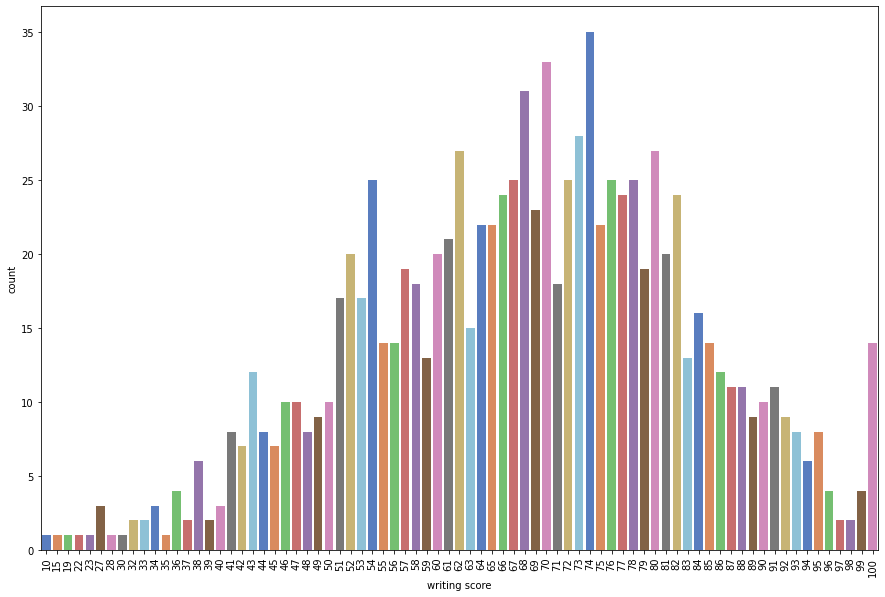

In [46]:
plt.figure(figsize=(15,10))
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

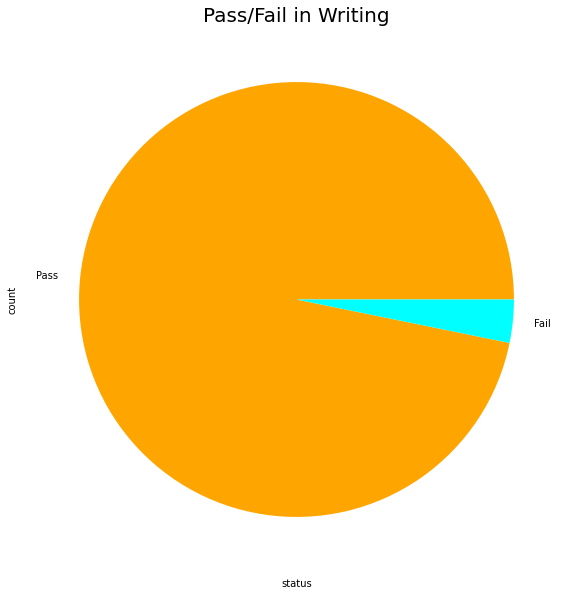

In [47]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail
plt.figure(figsize=(15,10))
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'cyan'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

OVERALL SCORES -> RESULT PASS/FAIL :

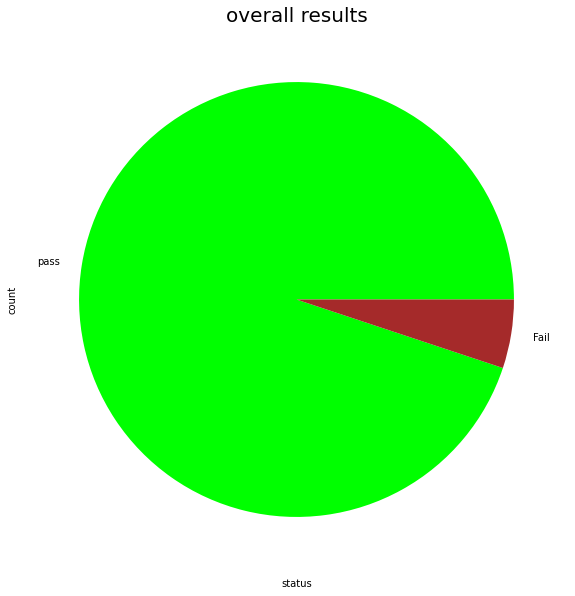

In [48]:
plt.figure(figsize=(15,10))
# checking which student is fail overall

df['status'] =df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

df['status'].value_counts(dropna = False).plot.pie(colors = ['lime', 'brown'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


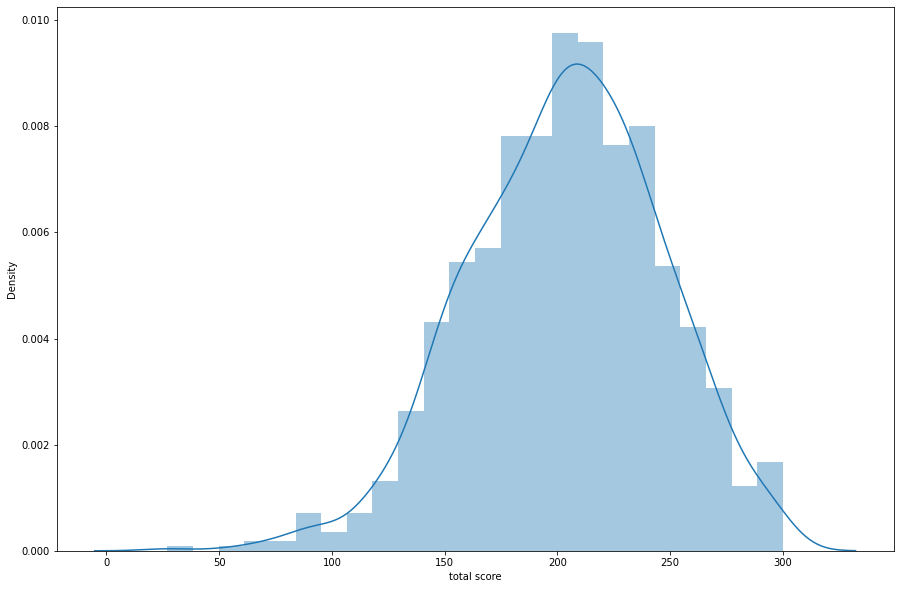

In [49]:
plt.figure(figsize=(15,10))
sns.distplot(df['total score']);

<Figure size 1080x720 with 0 Axes>

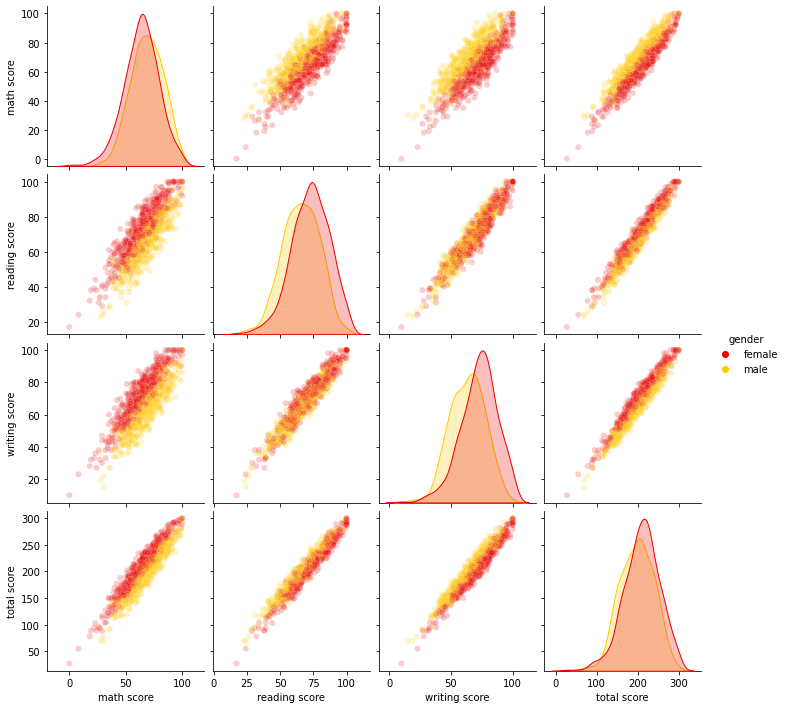

In [50]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

Gender wise performance on each score is shown above. We can clearly see that the average scores of females are always higher than the males in each of the math, writing and reading scores. 

Also to be noted, all the scores are linearly increasing with each other.

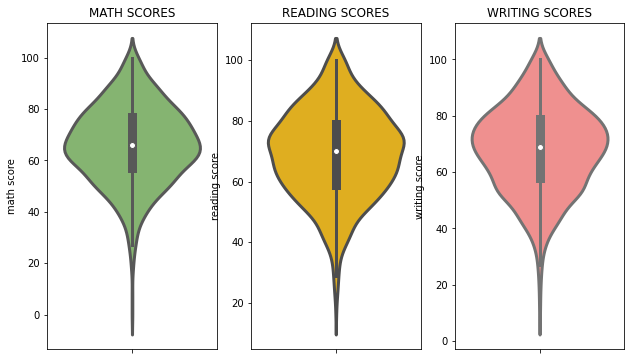

In [51]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Correlation between the 4 scores

In [52]:
df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


This shows the students scoring good in one subject, score good overall (in all the subjects)

Text(0.5, 1.0, 'Covariance Plot')

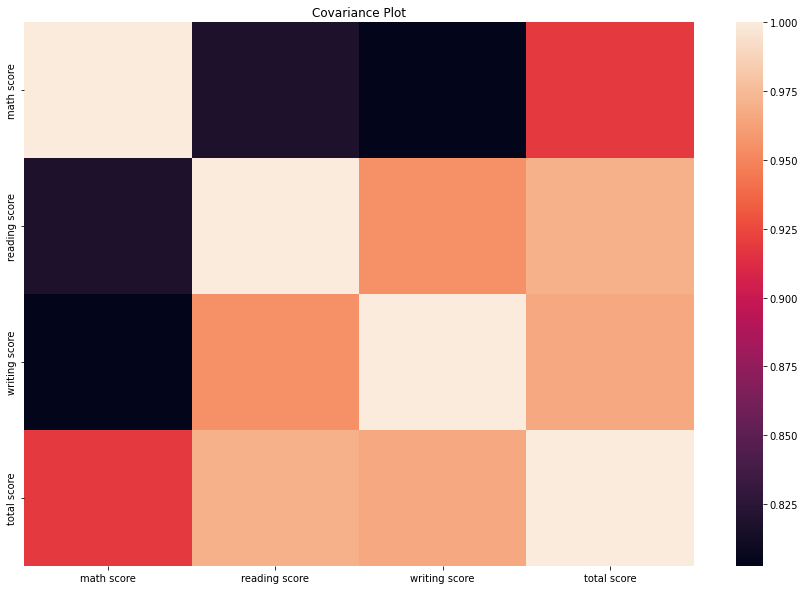

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.title('Covariance Plot')


As can be observed from the above Covariance plot that there is a strong correlation between 'reading score' and 'writing score'. The 'math score' is also correlated with the 'reading score' and 'writing score'

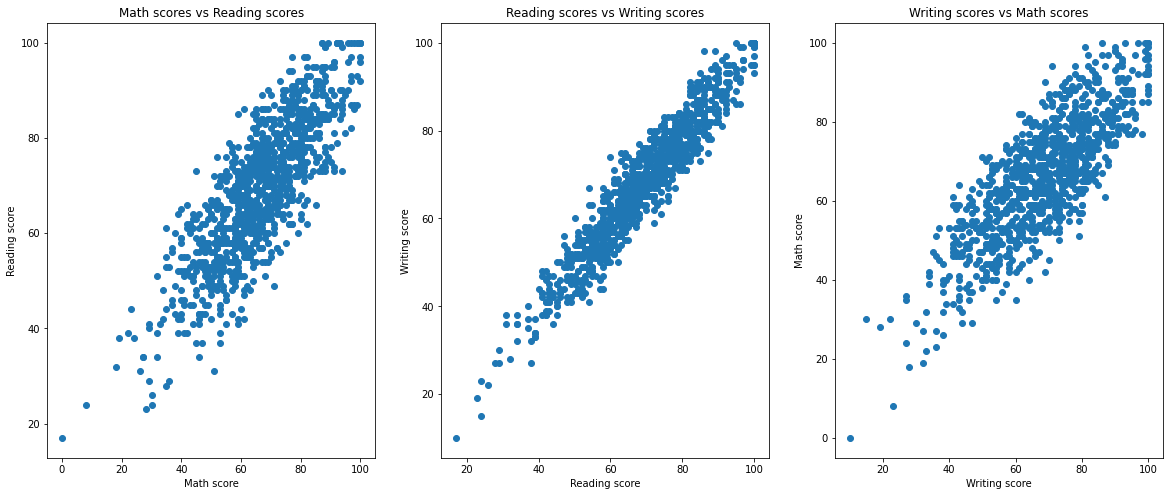

In [54]:
#Scatter plot of scores in different subjects to visualize correlation among them
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.scatter(df['math score'],df['reading score'])
plt.title('Math scores vs Reading scores')
plt.xlabel('Math score')
plt.ylabel('Reading score')

plt.subplot(1,3,2)
plt.scatter(df['reading score'],df['writing score'])
plt.title('Reading scores vs Writing scores')
plt.xlabel('Reading score')
plt.ylabel('Writing score')

plt.subplot(1,3,3)
plt.scatter(df['writing score'],df['math score'])
plt.title('Writing scores vs Math scores')
plt.xlabel('Writing score')
plt.ylabel('Math score')

plt.show()

There is a strong correlation between the scores.The plot shows the same observation as seen from calculating correlation among scores in different subjects. Also reading vs writing scatter plot is much more dense than reading vs maths or writing vs maths which shows higher correalation among them - students better in reading(or writing) are better in writing(or reading).

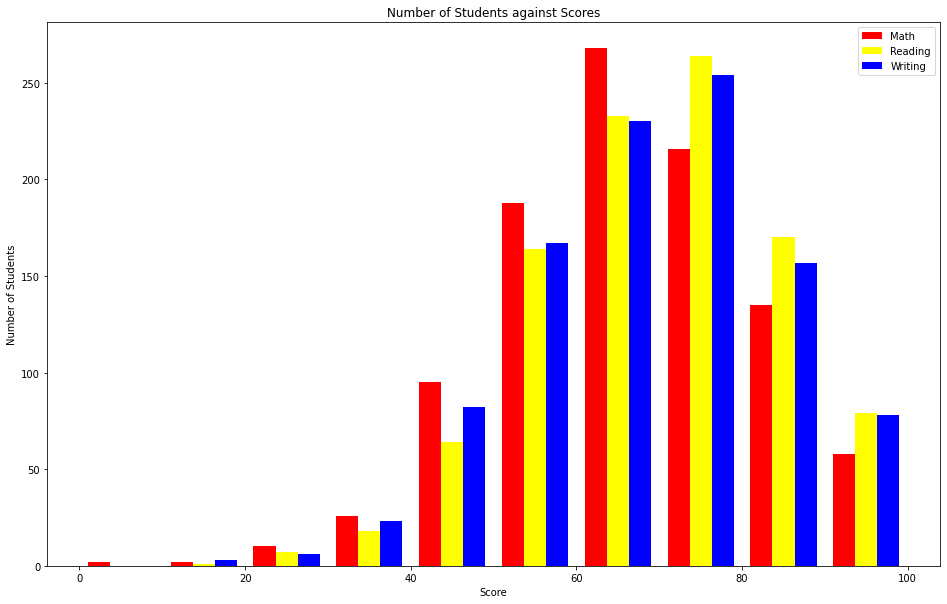

In [55]:
#Number of Students against Scores in all the 3 subjects
plt.figure(figsize=(16,10))
plt.hist([df['math score'],df['reading score'],df['writing score']], color=['red', 'yellow', 'blue'])
plt.title('Number of Students against Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.legend(['Math', 'Reading', 'Writing'])
plt.show()

Interesting. Number of students with higher score in mathematics have dropped below than reading and writing which may show that is easier to get a higher score in reading and writing than mathematics.

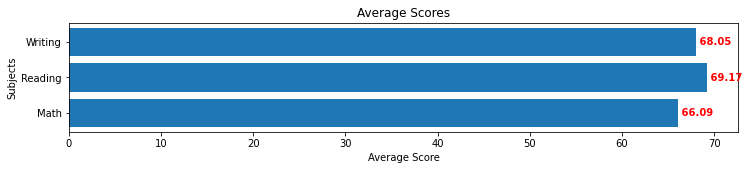

In [56]:
y = ['Math','Reading','Writing']
width = [df['math score'].mean(),df['reading score'].mean(),df['writing score'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y, 
         width = width)
plt.title('Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Subjects')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='red', va='center', fontweight='bold')
plt.show()

Average score is highest in reading and lowest in mathematics.

So as we have analysed the impact of different features on the student's performance and we observed that factors like 'gender', 'race/ethinicty', 'lunch', 'test preparation course' and 'parental level of education' impacted the scores obtained by the students.

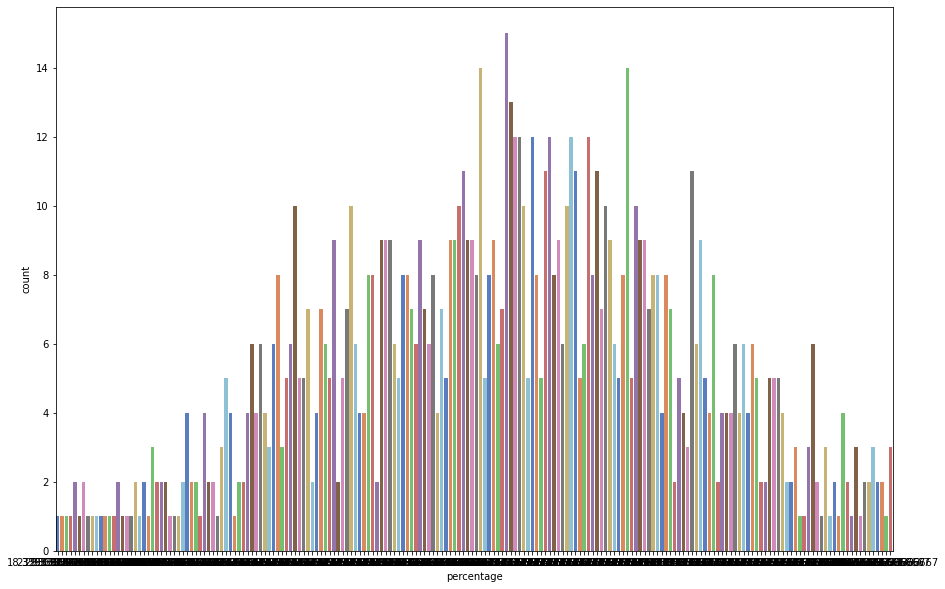

In [57]:
df['percentage'] =df['total score']/3

plt.figure(figsize=(15,10))
p = sns.countplot(x="percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [58]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] =df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

B    261
C    256
D    234
A    146
O     52
E     51
Name: grades, dtype: int64

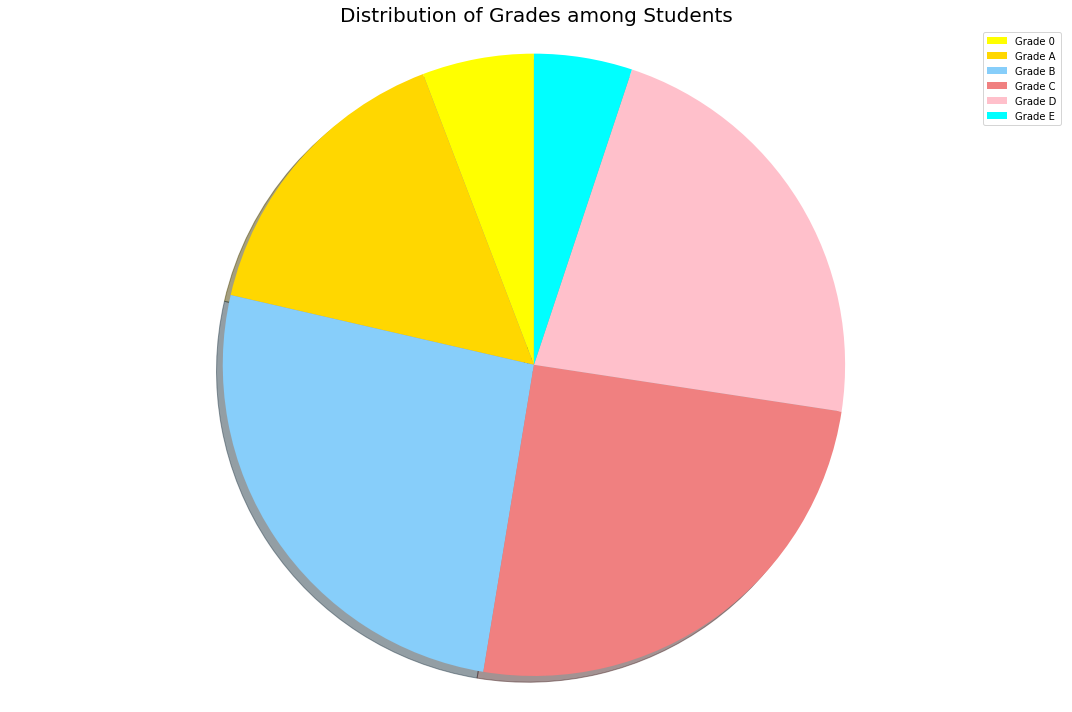

In [59]:
# plotting a pie chart for the distribution of various grades amongst the students
plt.figure(figsize=(15,10))
labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

## **Conclusions & Insights from the EDA:**

*   Girls performed better than boys in reading as well as writing but boys have performed better in mathematics than girls.

*   Students whose parents have higher level of education have performed better.

*   Students taking standard lunch are performing much better than the students taking free/reduced lunch.

*   Students belonging to group E of race/ethnicity have performed better than any other group.

*   Completing a test preparation course is really helping students a lot to achieve high marks in every subject.

*   Students scoring good in one subject are more likely to score good in all the subjects as the relation varies linearly in increasing manner.

*   Scoring in Reading , Writing is easier than scoring in Maths.

*   Highest no. of students have secured grades B,C,D. Only 52 students have secured grade O (i.e. above 90%)

*   Most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.









#### *EXTRA:*

We can simply use pandas profiling and get the EDA of the whole dataset done in one line of code.

The report consist of the following:

~ DataFrame overview,

~ Each attribute on which DataFrame is defined,

~ Correlations between attributes (Pearson Correlation and Spearman Correlation),

~A sample of DataFrame.

# Encoding

In [60]:
def one_hot_encode(df, column):
    encoded = pd.get_dummies(df[column], drop_first= True)
    df = df.drop(column, axis = 1)
    df = df.join(encoded)
    return df

In [61]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course','Pass/Fail']
for col in columns:
    df = one_hot_encode(df, col)

In [62]:
df.head()

,math score,reading score,writing score,total score,pass_math,pass_reading,pass_writing,status,percentage,grades,...,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none,P
0,72,72,74,218,Pass,Pass,Pass,pass,72.666667,B,...,0,0,1,0,0,0,0,1,1,1
1,69,90,88,247,Pass,Pass,Pass,pass,82.333333,A,...,0,0,0,0,0,1,0,1,0,1
2,90,95,93,278,Pass,Pass,Pass,pass,92.666667,O,...,0,0,0,0,1,0,0,1,1,1
3,47,57,44,148,Pass,Pass,Pass,pass,49.333333,D,...,0,0,0,0,0,0,0,0,1,1
4,76,78,75,229,Pass,Pass,Pass,pass,76.333333,B,...,0,0,0,0,0,1,0,1,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   math score         1000 non-null   int64  
 1   reading score      1000 non-null   int64  
 2   writing score      1000 non-null   int64  
 3   total score        1000 non-null   int64  
 4   pass_math          1000 non-null   object 
 5   pass_reading       1000 non-null   object 
 6   pass_writing       1000 non-null   object 
 7   status             1000 non-null   object 
 8   percentage         1000 non-null   float64
 9   grades             1000 non-null   object 
 10  male               1000 non-null   uint8  
 11  group B            1000 non-null   uint8  
 12  group C            1000 non-null   uint8  
 13  group D            1000 non-null   uint8  
 14  group E            1000 non-null   uint8  
 15  bachelor's degree  1000 non-null   uint8  
 16  high school        1000 n

In [66]:
df.drop(['pass_math','pass_reading','pass_writing','status','grades'],axis=1,inplace= True)

In [68]:
df.head(10)

,math score,reading score,writing score,total score,percentage,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none,P
0,72,72,74,218,72.666667,0,1,0,0,0,1,0,0,0,0,1,1,1
1,69,90,88,247,82.333333,0,0,1,0,0,0,0,0,1,0,1,0,1
2,90,95,93,278,92.666667,0,1,0,0,0,0,0,1,0,0,1,1,1
3,47,57,44,148,49.333333,1,0,0,0,0,0,0,0,0,0,0,1,1
4,76,78,75,229,76.333333,1,0,1,0,0,0,0,0,1,0,1,1,1
5,71,83,78,232,77.333333,0,1,0,0,0,0,0,0,0,0,1,1,1
6,88,95,92,275,91.666667,0,1,0,0,0,0,0,0,1,0,1,0,1
7,40,43,39,122,40.666667,1,1,0,0,0,0,0,0,1,0,0,1,0
8,64,64,67,195,65.000000,1,0,0,1,0,0,1,0,0,0,0,0,1
9,38,60,50,148,49.333333,0,1,0,0,0,0,1,0,0,0,0,1,0


In [69]:
df.drop(['total score','percentage'],axis=1,inplace = True)

In [70]:
df.head(10)

,math score,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none,P
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0,1
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1,1
5,71,83,78,0,1,0,0,0,0,0,0,0,0,1,1,1
6,88,95,92,0,1,0,0,0,0,0,0,1,0,1,0,1
7,40,43,39,1,1,0,0,0,0,0,0,1,0,0,1,0
8,64,64,67,1,0,0,1,0,0,1,0,0,0,0,0,1
9,38,60,50,0,1,0,0,0,0,1,0,0,0,0,1,0


# Modelling

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [77]:
X = df.drop('P', axis= 1)
y = df['P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 9851)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
models = {
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier(verbose=0),
    'lightgbm' : LGBMClassifier(),
    'gradient boosting' : GradientBoostingClassifier(),
    'random forest' : RandomForestClassifier(),
    'support vector': SVC(),
}

In [79]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

xgboost trained
catboost trained
lightgbm trained
gradient boosting trained
random forest trained
support vector trained


In [80]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result

In [81]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

xgboost : 0.0
catboost : 0.011
lightgbm : 0.027
gradient boosting : 0.0
random forest : 0.011
support vector : 0.175


In [82]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,support vector,lightgbm,catboost,random forest,xgboost,gradient boosting
RMSE,0.174693,0.026992,0.01118,0.01118,0.0,0.0


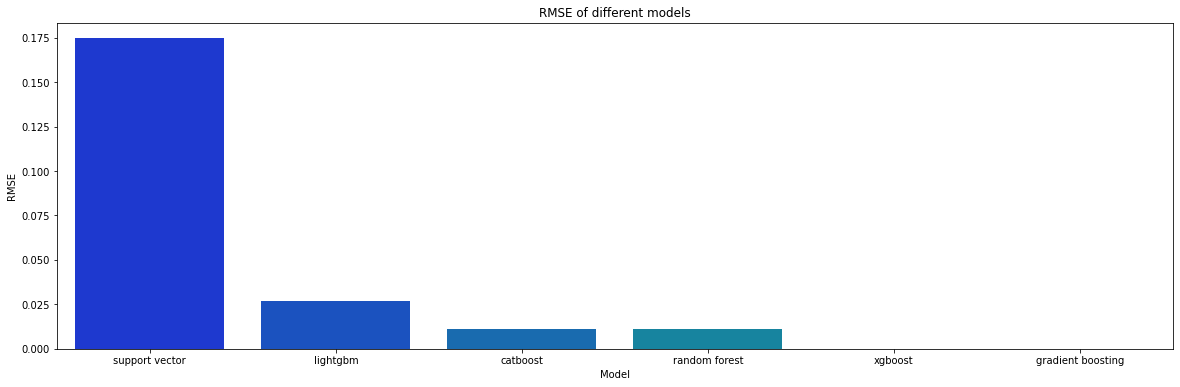

In [83]:
plt.figure(figsize = (20, 6))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'winter')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models');

XGBClassifier and GradientBoostingClassifer have 0 RMSE 

In [91]:
xgb_clf_predict = models['xgboost']

In [95]:
y_pred = xgb_clf_predict.predict(X_test)

In [94]:
y_test

882    1
246    1
114    1
348    1
537    1
      ..
598    1
845    1
357    1
480    1
883    1
Name: P, Length: 200, dtype: uint8

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       185

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

